# PYTHON PROJECT
## Africa Food Prices
------

Food prices refer to the average price of particular food commodities globally and across countries.

The price of goods not only provide an important indicator of the balance between agricultural production and market demand, but also have strong impacts on food affordability and income.

As we look through the Africa food prices dataset, we will be able to get insight from the data after performing EDA , asking and answering question using the dataset


## Setup The Environment
-----

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
%matplotlib inline
import matplotlib
print('done')


done


## Loading The Dataset
-----
Now we are ready to load the dataset. We will do this using the standard read_csv command from Pandas. Let's take a glimpse at how the data looks like.

In [2]:
food_df = pd.read_csv('./dataset/food.csv')
food_df.head(3)

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN


## Columns Information
-----
The Columns needed to be specified
* pt_id = Market type id
* um_unit_id = Measurement id


After a good look at the dataset,it looks like we need to do some data preparation and cleaning.

## Data Preparation and Cleaning

In [3]:
food_df.info() # checking the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          956779 non-null  int64  
 1   country_id          956779 non-null  float64
 2   country             956779 non-null  object 
 3   state_id            956779 non-null  int64  
 4   state               830101 non-null  object 
 5   market_id           956779 non-null  int64  
 6   market              956779 non-null  object 
 7   produce_id          956779 non-null  int64  
 8   produce             956779 non-null  object 
 9   currency_id         956779 non-null  float64
 10  currency            956779 non-null  object 
 11  pt_id               956779 non-null  int64  
 12  market_type         956779 non-null  object 
 13  um_unit_id          956779 non-null  int64  
 14  quantity            956779 non-null  object 
 15  month               956779 non-nul

There are 956779 entries and 19 columns to work with for EDA.We can see a few columns that contain null values('state','mp_commoditysource')

In [4]:
food_df.nunique() # count the number of unique values

Unnamed: 0            956779
country_id                42
country                   42
state_id                 393
state                    311
market_id               1703
market                  1696
produce_id               389
produce                  457
currency_id                1
currency                  34
pt_id                      3
market_type                3
um_unit_id                81
quantity                  81
month                     12
year                      32
price                 108546
mp_commoditysource         0
dtype: int64

We can see that for each columns,there a lot of different unique values for some of them.It makes sense that price is large since prices of foods tends to be different.market_id and market also contain considerable amount of unique values.
From the data we can see that we have 42 different countries

In [5]:
food_df.columns #to get the different columns

Index(['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource'],
      dtype='object')

In [6]:
# Drop columns not needed in the analysis
food_df.drop(['Unnamed: 0','mp_commoditysource'],axis = 'columns' ,inplace = True)

# Dividing the countries to their subregions
Africa is divided into five different regions
- North africa
- Eastern Africa
- Central Africa
- Southern Africa
- Western Africa

In [7]:
food_df.country.unique()

array(['Algeria', 'Angola', 'Benin', 'Burundi', 'Cameroon', 'Cape Verde',
       'Central African Republic', 'Chad', 'Congo', 'Djibouti', 'Egypt',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland',
       'Togo', 'Uganda', 'Zambia', 'Zimbabwe'], dtype=object)

In [8]:
north = ['Algeria','Egypt','Sudan','Morocco','Tunisia','Libya']
east = ['Burundi','Comoros','Djibouti','Eritrea','Ethiopia','Kenya','Madagascar','Malawi','Mauritius','Mozambique','Rwanda','Seychelles','Somalia','South Sudan','Uganda','Zambia','Zimbabwe']
central = ['Angola','Cameroon','Chad','Congo','Central African Republic','Equatorial Guinea','Gabon']
south = ['Botswana','Swaziland','Lesotho','Namibia','South Africa']
west = ['Benin','Burkina Faso','Cape Verde','Ivory Coast','Gambia','Ghana','Guinea','Guinea-Bissau','Liberia','Mali','Mauritania','Niger','Nigeria','Senegal','Togo','Sierra Leone']

In [9]:
north = ['Algeria','Egypt','Sudan','Morocco','Tunisia','Libya']
east = ['Burundi','Comoros','Djibouti','Eritrea','Ethiopia','Kenya','Madagascar','Malawi','Mauritius','Mozambique','Rwanda','Seychelles','Somalia','South Sudan','Uganda','Zambia','Zimbabwe']
central = ['Angola','Cameroon','Chad','Congo','Central African Republic','Equatorial Guinea','Gabon']
south = ['Botswana','Swaziland','Lesotho','Namibia','South Africa']
west = ['Benin','Burkina Faso','Cape Verde','Ivory Coast','Gambia','Ghana','Guinea','Guinea-Bissau','Liberia','Mali','Mauritania','Niger','Nigeria','Senegal','Togo','Sierra Leone']
def region(reg):
    for i in north:
        if reg.country == i:
            return 'north africa'
    for i in east:
        if reg.country == i:
            return 'east africa'
    for i in central:
        if reg.country == i:
            return 'central africa'
    for i in south:
        if reg.country == i:
            return 'south africa'
    for i in west:
        if reg.country == i:
            return 'west africa'
    
    
food_df['region'] = food_df.apply(region,axis = 1)       

In [10]:
food_df

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,region
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0000,north africa
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0000,north africa
2,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0000,north africa
3,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0000,north africa
4,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0000,north africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956774,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,233.3333,east africa
956775,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,0.0,ZWL,15,Retail,116,100 ML,6,2021,112.5000,east africa
956776,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,114.0000,east africa
956777,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,0.0,ZWL,15,Retail,66,250 G,6,2021,59.5000,east africa


In [11]:
# To get trends with the price column we have to convert it to a uniform price column
# we are going to use the current exchange rate for this uniform price column which will be in usd


## Handling Null Values


In [12]:
food_df.isnull().values.any() # will tell us if there is null values

True

In [13]:
food_df.isnull().sum().sum() # it will give us the total null values in all the columns

126678

In [14]:
food_df.isnull().sum() # it shows the different columns and their null values

country_id          0
country             0
state_id            0
state          126678
market_id           0
market              0
produce_id          0
produce             0
currency_id         0
currency            0
pt_id               0
market_type         0
um_unit_id          0
quantity            0
month               0
year                0
price               0
region              0
dtype: int64

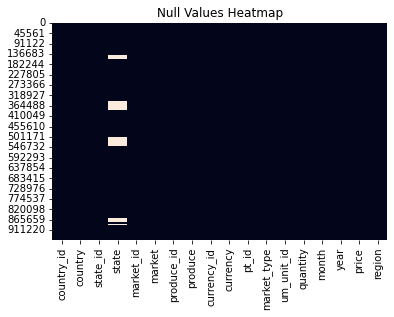

In [15]:
# lets show the heatmap for the null values
sns.heatmap(food_df.isnull(),cbar  = False)
plt.title('Null Values Heatmap')
plt.show()

Above from the heatmap we can see that the null values are peculiar to the state alone.We will have to handle the null data before the EDA

In [16]:
food_df['state'].fillna('No State',inplace = True)

In [17]:
food_df.isnull().any() # to confirm if we still have any null values

country_id     False
country        False
state_id       False
state          False
market_id      False
market         False
produce_id     False
produce        False
currency_id    False
currency       False
pt_id          False
market_type    False
um_unit_id     False
quantity       False
month          False
year           False
price          False
region         False
dtype: bool

In [18]:
food_df.country.unique() # Checking the different countries we have

array(['Algeria', 'Angola', 'Benin', 'Burundi', 'Cameroon', 'Cape Verde',
       'Central African Republic', 'Chad', 'Congo', 'Djibouti', 'Egypt',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland',
       'Togo', 'Uganda', 'Zambia', 'Zimbabwe'], dtype=object)

In [19]:
# check the datatypes for all columns
food_df.dtypes

country_id     float64
country         object
state_id         int64
state           object
market_id        int64
market          object
produce_id       int64
produce         object
currency_id    float64
currency        object
pt_id            int64
market_type     object
um_unit_id       int64
quantity        object
month            int64
year             int64
price          float64
region          object
dtype: object

In [20]:
# from datetime import datetime
#food_df['Date'] = food_df.apply(lambda row: datetime.strptime(f"{int(row.month)}-{int(row.year)}", '%m-%Y'), axis=1)

In [21]:
# lets perform a little statistical work
# using the describe function
food_df.describe()

,country_id,state_id,market_id,produce_id,currency_id,pt_id,um_unit_id,month,year,price
count,956779.000000,956779.000000,956779.000000,956779.000000,956779.0,956779.000000,956779.000000,956779.000000,956779.000000,9.567790e+05
mean,1961.192782,22287.911831,1392.594222,186.141214,0.0,14.926716,14.017183,6.381471,2015.704015,4.128833e+03
std,10404.034922,98565.608270,1027.751212,165.401303,0.0,0.263570,24.437728,3.418025,4.603829,1.381840e+05
min,4.000000,0.000000,101.000000,50.000000,0.0,14.000000,5.000000,1.000000,1990.000000,0.000000e+00
25%,90.000000,1836.000000,528.000000,67.000000,0.0,15.000000,5.000000,3.000000,2013.000000,6.500000e+01
50%,155.000000,2209.000000,1078.000000,105.000000,0.0,15.000000,5.000000,6.000000,2017.000000,2.505714e+02
75%,205.000000,21971.000000,2281.000000,262.000000,0.0,15.000000,9.000000,9.000000,2020.000000,7.221005e+02
max,70001.000000,900003.000000,6081.000000,887.000000,0.0,17.000000,175.000000,12.000000,2021.000000,1.725000e+07


We can see that the least year is 1990 and the highest is 2021

In [22]:
food_df.head()

,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,region
0,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,north africa
1,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,north africa
2,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,north africa
3,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,north africa
4,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,north africa


Lets take another look at the dataset

# Data Visualization Of Whole Dataset

In [23]:
# Top 10 countries with the most record
top_10 = food_df.groupby(['country']).country_id.count().sort_values(ascending=False)[:10]
top_10

country
Rwanda        137746
Mali           73843
Burundi        60921
Gambia         56971
Niger          54974
Nigeria        50285
Zambia         42793
Mozambique     42278
Libya          41207
Benin          39530
Name: country_id, dtype: int64

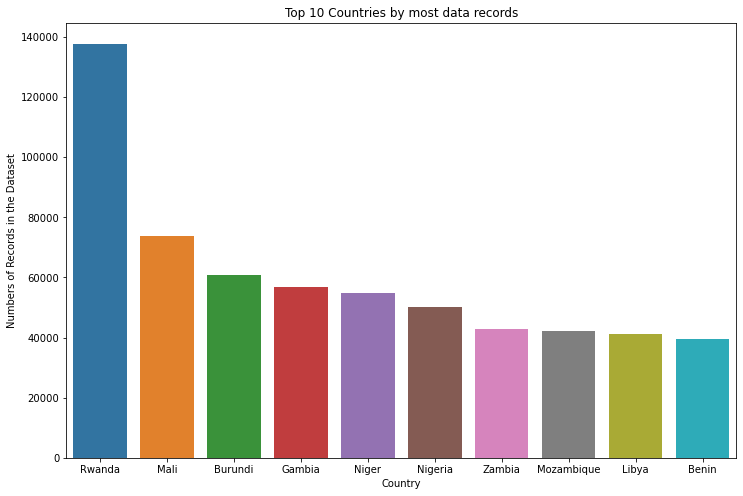

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(x = top_10.index,y=top_10.values)
plt.xlabel('Country')
plt.ylabel('Numbers of Records in the Dataset')
plt.title('Top 10 Countries by most data records')
plt.show()

In [25]:
# Top 20 most reported commodities
com_20 = food_df.groupby(['produce']).produce_id.count().sort_values(ascending = False)[:20]
com_20

produce
Millet - Retail                  47476
Rice (imported) - Retail         47022
Sorghum - Retail                 44679
Maize - Retail                   43073
Maize (white) - Retail           33786
Rice (local) - Retail            31126
Groundnuts (shelled) - Retail    23221
Beans (dry) - Retail             16173
Beans (niebe) - Retail           15760
Rice - Retail                    15513
Oil (vegetable) - Retail         14799
Wheat flour - Retail             13935
Oil (palm) - Retail              13749
Tomatoes - Retail                11562
Cassava flour - Retail           11506
Sugar - Retail                   11490
Maize flour - Retail             11407
Sweet potatoes - Retail          11208
Bananas - Retail                 10775
Beans - Retail                   10623
Name: produce_id, dtype: int64

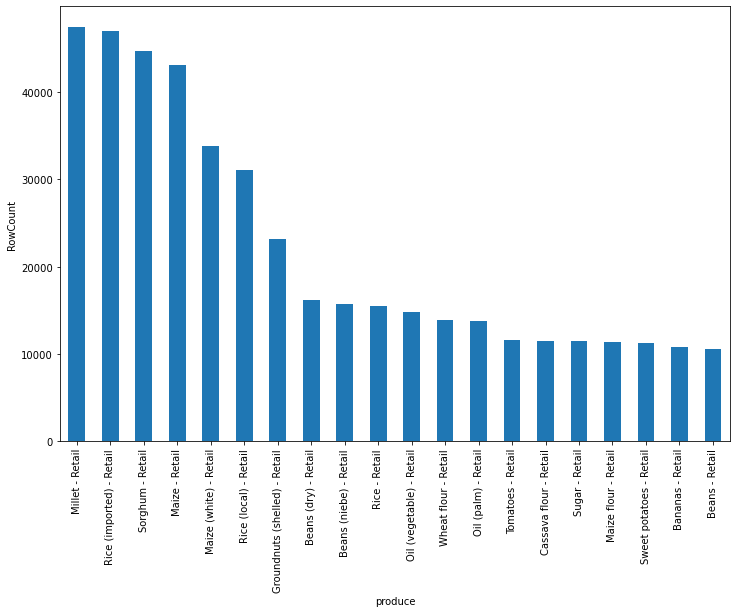

In [26]:

ax= com_20.plot(kind='bar', y = 'com_20.values',x ='com_20.index',    
    legend = False,figsize=(12,8), fontsize=10)
ax.set_xlabel("produce",fontsize=10)
ax.set_ylabel("RowCount",fontsize=10)
plt.show()

In [27]:
# Unique state count for each country
dups = food_df.drop_duplicates(['country','state'], keep = 'last')
state_count = dups.groupby(['country']).count()
d = state_count.sort_values('country_id',ascending = False)
d['country_id']

country
Madagascar                  20
Somalia                     18
Uganda                      18
Burundi                     17
Central African Republic    16
Liberia                     15
Senegal                     14
Nigeria                     14
Sudan                       13
Benin                       12
Mauritania                  12
Ethiopia                    11
Zimbabwe                    10
Lesotho                     10
Ghana                       10
Guinea-Bissau                9
Zambia                       9
Mali                         9
Cameroon                     9
Guinea                       8
Namibia                      8
Niger                        8
Congo                        7
Gambia                       6
Kenya                        6
Djibouti                     5
Rwanda                       5
Togo                         4
Sierra Leone                 4
Malawi                       3
Cape Verde                   3
Algeria                      2


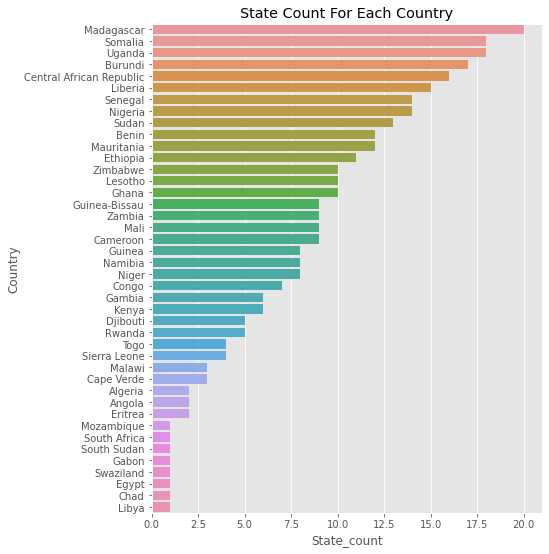

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=(7,9))
g = sns.barplot(x=d.country_id,y=d.index,data=d)
plt.title('State Count For Each Country')
plt.xlabel('State_count')
plt.ylabel('Country')
plt.show()

In [29]:
dupss =  food_df.drop_duplicates(['country','produce'], keep = 'last') # droping duplicate values
produce_count = dupss.groupby(['country']).count()
p = produce_count.sort_values('produce_id',ascending = False)[:10]
p['produce_id']

country
Ethiopia         107
Gambia            77
Rwanda            67
Cameroon          61
Nigeria           58
Benin             55
South Sudan       53
Guinea-Bissau     53
Mali              48
Ghana             47
Name: produce_id, dtype: int64

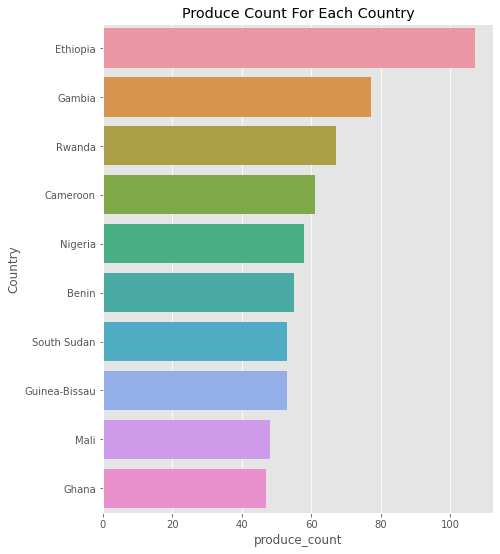

In [30]:
#The different kinds of product a country produced from 1990 - 2021
plt.style.use('ggplot')
plt.figure(figsize=(7,9))
g = sns.barplot(x=p.produce_id,y=p.index,data=p)
plt.title('Produce Count For Each Country')
plt.xlabel('produce_count')
plt.ylabel('Country')
plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


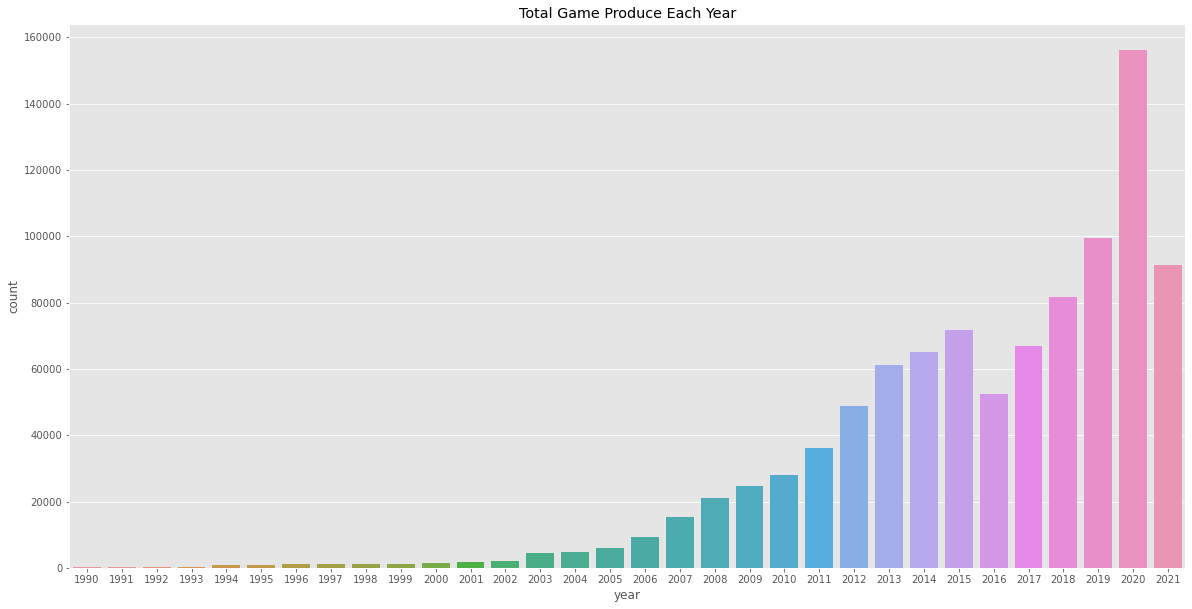

In [31]:
plt.figure(figsize = (20,10))
sns.countplot('year', data = food_df)
plt.title('Total Game Produce Each Year')
plt.show()

In [32]:
nth = food_df.loc[food_df.region == 'north africa']
sth = food_df.loc[food_df.region == 'south africa']
est = food_df.loc[food_df.region == 'east africa']
ctl = food_df.loc[food_df.region == 'central africa']

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


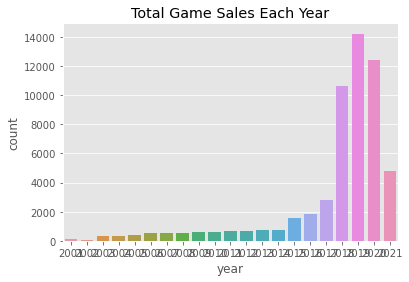

In [ ]:
sns.countplot('year', data = nth)
plt.title('Total Game Sales Each Year')
plt.show()

In [ ]:
get the produce count in each year for each region
using data analysis of video game sales-compare produce count for each year based on different regions
check the total produce count

SyntaxError: invalid syntax (Temp/ipykernel_17856/76412882.py, line 1)